In [34]:
import pandas as pd # import pandas as alias pd
from pygments.lexer import include

In [35]:
df = pd.read_csv("ensurance.csv") # .red_csv ktqra files mais khass darori ykono f directory je pense la mkanx khass dir path.join()

In [36]:
print("shape:", df.shape) # shape kt3tik xhal mn rowe and column kynin
df.head() #kt3tik l 5 rows lowlin mais ymkn lid t customizi bhal .head(10)

shape: (1338, 7)


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


2_ types and summary

In [37]:
df.info() #Prints a summary of the DataFrame: number of entries , index range, column names, non-null count for each column, and each column’s dtype (int, float, object, etc.)
display(df.describe(include='all').T)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
age,1338.0,NaN,NaN,NaN,39.207025,14.04996,18.0,27.0,39.0,51.0,64.0
sex,1338,2,male,676,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bmi,1338.0,NaN,NaN,NaN,30.663397,6.098187,15.96,26.29625,30.4,34.69375,53.13
children,1338.0,NaN,NaN,NaN,1.094918,1.205493,0.0,0.0,1.0,2.0,5.0
smoker,1338,2,no,1064,NaN,NaN,NaN,NaN,NaN,NaN,NaN
region,1338,4,southeast,364,NaN,NaN,NaN,NaN,NaN,NaN,NaN
charges,1338.0,NaN,NaN,NaN,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


TAche 2:
Comprendre la structure générale du jeu de données (types de données, dimensions, aperçus).

In [38]:
# dimensions:
print("Shape:", df.shape)

#types and non null counts
df.info()




Shape: (1338, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


2 _ Effectuer une analyse descriptive des données (moyennes, médianes, écarts-types pour les variables numériques ; fréquences pour les catégoriques).

In [39]:
print(df.describe().T[['mean', '50%', 'std', 'min', 'max']])  # median is '50%' in output (lvaleur li jat lwst ) ; mean howa : The arithmetic average of all values (sum of values) / (number of values). ; standard knxofo bih xhal kola points b3ida 3la mean : Example: For [1, 2, 3, 4, 5], std ≈ 1.41.
# With .T, columns become rows and statistics become columns, making it easier to read if you have many columns.

# Frequencies for categorical columns
for col in df.select_dtypes(include=['object', 'category']):  #hna knho l frequense les categorie li maxi num f cnhsbo lcout xhal t3awdo
    print(f"\nValue counts for {col}:")
    print(df[col].value_counts(dropna=False))

                  mean       50%           std        min          max
age          39.207025    39.000     14.049960    18.0000     64.00000
bmi          30.663397    30.400      6.098187    15.9600     53.13000
children      1.094918     1.000      1.205493     0.0000      5.00000
charges   13270.422265  9382.033  12110.011237  1121.8739  63770.42801

Value counts for sex:
sex
male      676
female    662
Name: count, dtype: int64

Value counts for smoker:
smoker
no     1064
yes     274
Name: count, dtype: int64

Value counts for region:
region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64


3 Identifier les valeurs manquantes et les doublons.

In [40]:
print("Missing values per column:")
print(df.isna())
# isna() give u th amplicaple valeurs and su count them
# Duplicate rows count
print("Number of duplicate rows:", df.duplicated())

Missing values per column:
        age    sex    bmi  children  smoker  region  charges
0     False  False  False     False   False   False    False
1     False  False  False     False   False   False    False
2     False  False  False     False   False   False    False
3     False  False  False     False   False   False    False
4     False  False  False     False   False   False    False
...     ...    ...    ...       ...     ...     ...      ...
1333  False  False  False     False   False   False    False
1334  False  False  False     False   False   False    False
1335  False  False  False     False   False   False    False
1336  False  False  False     False   False   False    False
1337  False  False  False     False   False   False    False

[1338 rows x 7 columns]
Number of duplicate rows: 0       False
1       False
2       False
3       False
4       False
        ...  
1333    False
1334    False
1335    False
1336    False
1337    False
Length: 1338, dtype: bool


Analyser la distribution des variables numériques (ex. : histogrammes avec Matplotlib/Seaborn).

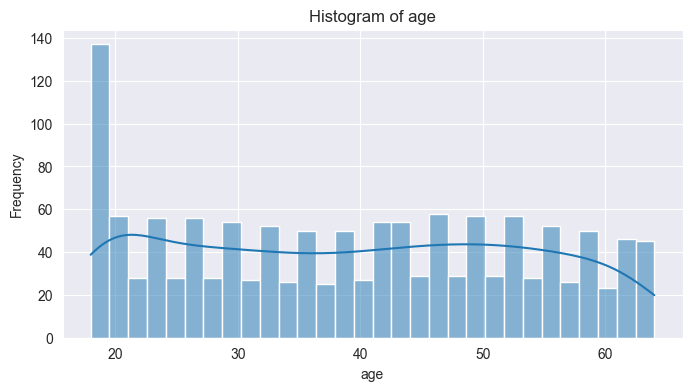

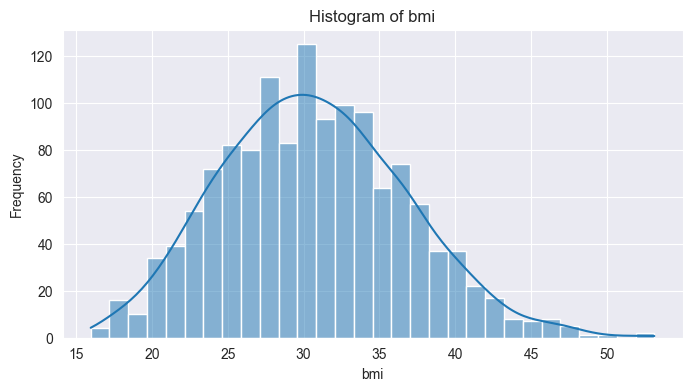

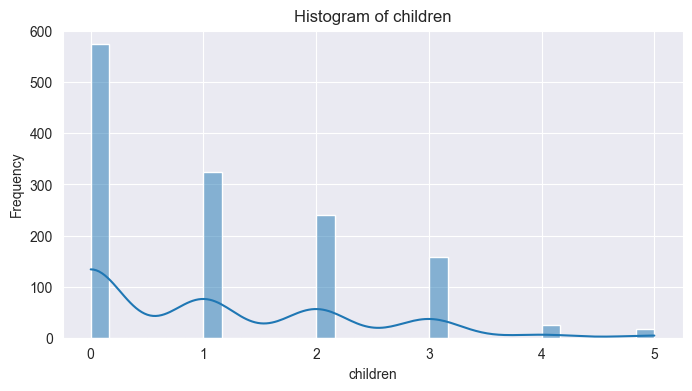

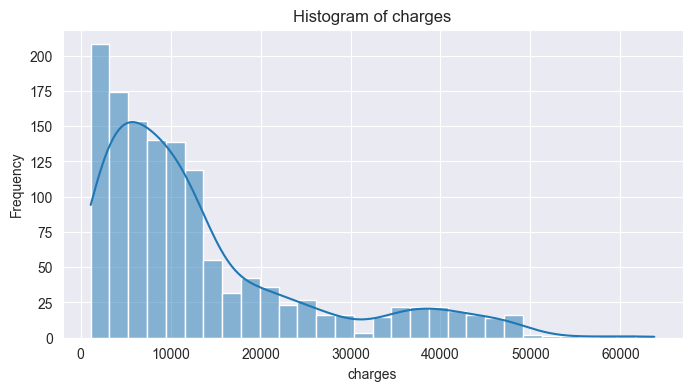

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select numeric columns
numeric_cols = df.select_dtypes(include=['number']).columns

# Plot histograms for each numeric column
for col in numeric_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col].dropna(), kde=True, bins=30)
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()


    #for the kde the curve we can conclude it as : “If I pick a random value from this column, how likely is it to be around X?”

Étudier les relations entre variables à l'aide de matrices de corrélation et de visualisations (pairplots ou heatmaps):

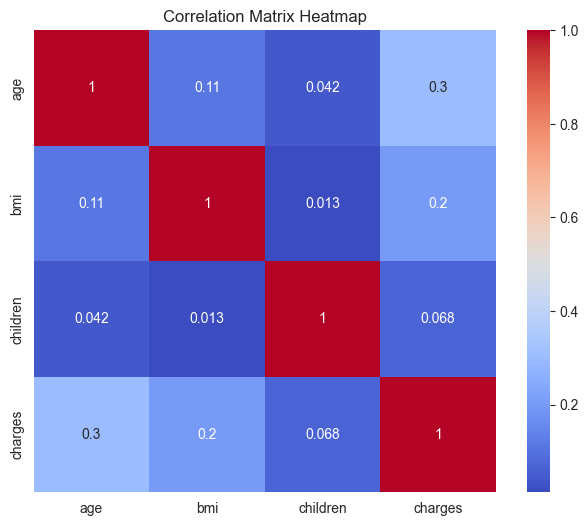

In [42]:
# Importing required libraries
import matplotlib.pyplot as plt   # Matplotlib is used for creating static, animated, and interactive visualizations
import seaborn as sns             # Seaborn builds on top of Matplotlib and provides high-level functions
                                  # for attractive and informative statistical graphics

# Select numeric columns from the DataFrame
# - df is assumed to be a pandas DataFrame containing your dataset.
# - select_dtypes(include=['number']) filters only the numeric columns
#   (e.g., integers, floats) since correlation makes sense only for numerical data.
# - .columns returns the list of column names that are numeric.
numeric_cols = df.select_dtypes(include=['number']).columns

# Compute the correlation matrix for the numeric columns
# - df[numeric_cols] creates a new DataFrame containing only numeric columns.
# - .corr() calculates the pairwise correlation between these numeric columns.
# - The result is a symmetric matrix where each cell (i, j)
#   represents the correlation coefficient between column i and column j.
# - Correlation values range from -1 to +1:
#     -1 = perfect negative correlation (when one increases, the other decreases),
#      0 = no correlation,
#     +1 = perfect positive correlation (both move together).
corr_matrix = df[numeric_cols].corr()

# Plotting the heatmap for correlation visualization
# - plt.figure(figsize=(8, 6)) sets the overall figure size (width=8, height=6 inches).
plt.figure(figsize=(8, 6))

# - sns.heatmap() is used to create a heatmap (colored grid) from the correlation matrix.
#   Arguments explained:
#   * corr_matrix → the data being visualized (our correlation matrix).
#   * annot=True → writes the correlation values inside the heatmap cells for readability.
#   * cmap='coolwarm' → sets the color palette ranging from cool (blue) to warm (red).
#       Blue tones indicate negative correlations, red tones indicate positive ones.
#   * square=True → makes each cell a square for a neat, proportional look.
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True)

# - Adding a title to explain what the plot represents.
plt.title('Correlation Matrix Heatmap')

# - Finally, plt.show() displays the heatmap in an output window or notebook.
plt.show()


Tâche 3 : Prétraitement des données
Gestion des valeurs manquantes (ex. : imputation avec la médiane pour les numériques ou le mode pour les catégoriques).

In [43]:
for col in df.select_dtypes(include=['number']).columns:
    median_value = df[col].median()
    df[col].fillna(median_value, inplace=True)


#for other categerys than num
for col in df.select_dtypes(include=['object', 'category']).columns:
    # - df.select_dtypes(include=['object', 'category']) selects string/object or category columns.
    # - For categorical variables (e.g., Gender, City, Product), the most frequent value (mode) is used.
    # - Reason: If 'Casablanca' is the most common city, filling missing values with it
    #   is safer than choosing randomly or dropping data.

    mode_value = df[col].mode(dropna=True)[0]  # Find the most frequent value (mode) , hna mode #ktr3 ktr mn value la kno joj mtsawyin fl count so [0] ktjib lwl wknfiro wst mode()#dropna=true hitax y9d ykon null aktar haja t3awdat

    # Replace missing values (NaN) with the mode
    df[col].fillna(mode_value, inplace=True)

    # Print for tracking
    print(f"Filled missing values in categorical column '{col}' with mode: {mode_value}")

Filled missing values in categorical column 'sex' with mode: male
Filled missing values in categorical column 'smoker' with mode: no
Filled missing values in categorical column 'region' with mode: southeast


C:\Users\redaj\AppData\Local\Temp\ipykernel_50480\467852817.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(median_value, inplace=True)
C:\Users\redaj\AppData\Local\Temp\ipykernel_50480\467852817.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, wh

Suppression des doublons.

In [44]:
df.drop_duplicates(inplace=True) #deletes all duplicate rows in your DataFrame. inplace=True means the operation changes your original DataFrame directly.


3 Détection et gestion des valeurs aberrantes : Utiliser des techniques statistiques (ex. : boîte à moustaches avec Seaborn, z-score > 3, ou IQR pour identifier les outliers) et gérer les lignes contenant des valeurs aberrantes (suppression).

In [45]:
import numpy as np  # Import the numpy library for numerical operations

# Loop through each column in the list of numeric columns
numeric_cols =['age' , 'bmi','children']
#tet = numeric_cols.drop(columns=["charges"])
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)        # Calculate the first quartile (25th percentile) of the column
    Q3 = df[col].quantile(0.75)        # Calculate the third quartile (75th percentile) of the column
    IQR = Q3 - Q1                      # Compute the interquartile range (IQR)
    lower_bound = Q1 - 1.5 * IQR        # Define the lower bound for outliers
    upper_bound = Q3 + 1.5 * IQR        # Define the upper bound for outliers

    # Find and count the number of outliers in the column
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f"{col}: {outliers.shape[0]} outliers detected.")  # Display the number of outliers found

    # Remove rows where the column value is an outlier
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

age: 0 outliers detected.
bmi: 9 outliers detected.
children: 0 outliers detected.


4_Encoder les variables catégoriques (sexe, smoker, région) avec one-hot encoding ou label encoding.

In [46]:
categorical_cols = ['sex', 'smoker', 'region']

df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)




Diviser les données en ensembles d'entraînement et de test (80% / 20%) avec traintestsplit de Scikit-learn.

In [47]:
from sklearn.model_selection import train_test_split

# X: DataFrame with features (independent variables)
# y: Series with target (dependent variable, e.g. charges)

# Split the data into training and test sets
# test_size=0.2 means 20% of the data will be used for testing
# random_state=42 ensures the split is the same every time for reproducibility
#X_train, X_test, y_train, y_test = train_test_split(
    #X, y, test_size=0.2, random_state=42
#)

# Print the sizes of the splits to verify
#print("Taille X_train:", X_train.shape)
#print("Taille X_test:", X_test.shape)
#print("Taille y_train:", y_train.shape)
#print("Taille y_test:", y_test.shape)

Appliquer une normalisation (MinMaxScaler) ou une standardisation (StandardScaler) sur les variables numériques pour harmoniser les échelles.

In [48]:
# Import the scalers from scikit-learn
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Select only the numeric columns from your DataFrame
numeric_cols = df.select_dtypes(include=['number']).columns

# ----------- MinMaxScaler (Normalisation) -----------
# Create a MinMaxScaler object
minmax_scaler = MinMaxScaler()

# Fit the scaler to your numeric data and transform it
# This rescales each numeric column so its values are between 0 and 1
df_minmax = df.copy()  # Make a copy to keep your original data unchanged
df_minmax[numeric_cols] = minmax_scaler.fit_transform(df_minmax[numeric_cols])

print("Data after MinMaxScaler (values between 0 and 1):")
print(df_minmax[numeric_cols].head())

# ----------- StandardScaler (Standardisation) -----------
# Create a StandardScaler object
standard_scaler = StandardScaler()

# Fit the scaler to your numeric data and transform it
# This standardizes each numeric column: mean becomes 0 and standard deviation becomes 1
df_standard = df.copy()  # Make a copy to keep your original data unchanged
df_standard[numeric_cols] = standard_scaler.fit_transform(df_standard[numeric_cols])

#df = df_standard

print("Data after StandardScaler (mean=0, std=1):")
print(df_standard[numeric_cols].head())

Data after MinMaxScaler (values between 0 and 1):
        age       bmi  children   charges
0  0.021739  0.387788       0.0  0.256431
1  0.000000  0.578435       0.2  0.009821
2  0.217391  0.553426       0.6  0.054133
3  0.326087  0.219065       0.0  0.339389
4  0.304348  0.419617       0.0  0.044655
Data after StandardScaler (mean=0, std=1):
        age       bmi  children   charges
0 -1.440429 -0.445495 -0.908563  0.305500
1 -1.511669  0.546068 -0.080442 -0.958515
2 -0.799261  0.415999  1.575799 -0.731390
3 -0.443056 -1.323037 -0.908563  0.730710
4 -0.514297 -0.279953 -0.908563 -0.779969


In [51]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Try XGBoost gracefully (skip if not installed)
# 2) Split into features (X) and target (y)
y = df["charges"]
X = df.drop(columns=["charges"])

# 3) Turn text columns into numbers (one-hot encoding) the easy way
#    drop_first=True avoids duplicate columns for categories
X = pd.get_dummies(X, drop_first=True)

# 4) Split into train (80%) and test (20%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 5) Make the model
model = LinearRegression()

# 6) Train (fit) the model
model.fit(X_train, y_train)

# 7) Predict on the test set
y_pred = model.predict(X_test)
print(f"hada :{model.intercept_}{model.coef_}") and print(model.coef_)
# 8) Evaluate
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Linear Regression (basic) results on test set")
print(f"RMSE: {rmse:.2f}")
print(f"MAE:  {mae:.2f}")
print(f"R²:   {r2:.4f}")

# 9) (Optional) Show a few predictions vs real values
preview = pd.DataFrame({
    "Actual": y_test.values[:10],
    "Predicted": y_pred[:10]
})
print("\nSample predictions (first 10):")
print(preview)


df.head()

hada :-12180.86957885495[  259.03018039   349.24138678   529.46460959   -38.68805866
 23743.30576635  -574.6780471  -1302.60945429 -1549.50508836]
Linear Regression (basic) results on test set
RMSE: 5955.30
MAE:  4125.94
R²:   0.7448

Sample predictions (first 10):
        Actual     Predicted
0   5373.36425   7843.143236
1  30259.99556  13308.810641
2   8410.04685  10449.860264
3   6455.86265   7828.974390
4   4133.64165   4084.337401
5  10713.64400  13473.140704
6   6664.68595   8275.667913
7   4347.02335   6698.249694
8   3554.20300   3714.517158
9  11538.42100  17625.757056


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [53]:
# Compare LinearRegression, RandomForestRegressor, XGBRegressor, and SVR
# Simple style: pandas.get_dummies + train_test_split + fit/predict + metrics
# Note: SVR needs scaling; we'll scale only for SVR to keep it simple.

import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler

# Try XGBoost if installed; skip if not
try:
    from xgboost import XGBRegressor
    HAS_XGB = True
except Exception:
    HAS_XGB = False

# 1) Load the data
csv_path = "ensurance.csv"  # <- update if your file has a different name/path
df = pd.read_csv(csv_path)

# 2) Features/target
y = df["charges"]
X = df.drop(columns=["charges"])

# 3) Easy one-hot encoding for categorical columns
X = pd.get_dummies(X, drop_first=True)

# 4) Train/test split (80/20)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 5) Prepare models (default params)
models = {
    "LinearRegression": LinearRegression(),
    "RandomForestRegressor": RandomForestRegressor(random_state=42),
    "SVR": SVR(),  # default RBF kernel; needs scaling
}
if HAS_XGB:
    models["XGBRegressor"] = XGBRegressor(
        objective="reg:squarederror",
        random_state=42,
        verbosity=0
    )

# 6) Helper to compute metrics
def eval_metrics(y_true, y_pred):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    return rmse, mae, r2

# 7) Baseline (always predict the mean) to compare against
baseline = y_train.mean()
y_pred_base = np.full_like(y_test, baseline, dtype=float)
rmse_b = np.sqrt(mean_squared_error(y_test, y_pred_base))
print(f"Baseline (predict mean) RMSE: {rmse_b:.2f}\n")

# 8) Train, predict, evaluate each model
results = []
for name, model in models.items():
    if name == "SVR":
        # Scale features ONLY for SVR (everything is numeric after get_dummies)
        scaler = StandardScaler()
        X_train_use = scaler.fit_transform(X_train)
        X_test_use = scaler.transform(X_test)
    else:
        X_train_use = X_train
        X_test_use = X_test

    # Fit
    model.fit(X_train_use, y_train)

    # Predict
    y_pred = model.predict(X_test_use)

    # Metrics
    rmse, mae, r2 = eval_metrics(y_test, y_pred)
    results.append({"Model": name, "RMSE": rmse, "MAE": mae, "R2": r2})

    print(f"{name} results:")
    print(f"  RMSE: {rmse:.2f}")
    print(f"  MAE:  {mae:.2f}")
    print(f"  R²:   {r2:.4f}")

    # Optional: show a few predictions for the first model only to keep output short
    if name == "LinearRegression":
        preview = pd.DataFrame({"Actual": y_test.values[:5], "Predicted": y_pred[:5]})
        print("  Sample predictions:\n", preview, "\n")

# 9) Summary table sorted by RMSE (lower is better)
results_df = pd.DataFrame(results).sort_values("RMSE").reset_index(drop=True)
print("\nSummary (sorted by RMSE):")
print(results_df)

Baseline (predict mean) RMSE: 12465.61

LinearRegression results:
  RMSE: 5796.28
  MAE:  4181.19
  R²:   0.7836
  Sample predictions:
         Actual     Predicted
0   9095.06825   8969.550274
1   5272.17580   7068.747443
2  29330.98315  36858.410912
3   9301.89355   9454.678501
4  33750.29180  26973.173457 

RandomForestRegressor results:
  RMSE: 4576.30
  MAE:  2550.08
  R²:   0.8651
SVR results:
  RMSE: 12889.10
  MAE:  8612.41
  R²:   -0.0701

Summary (sorted by RMSE):
                   Model          RMSE          MAE        R2
0  RandomForestRegressor   4576.299916  2550.078471  0.865103
1       LinearRegression   5796.284659  4181.194474  0.783593
2                    SVR  12889.096315  8612.408423 -0.070082
